In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 데이터 준비하기 

In [4]:
import pandas as pd #모듈불러오기

In [14]:
df=pd.read_csv("insurance.csv") #파일불러오기
print(df) #어레이형태로

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


In [15]:
perch_full=df.to_numpy() #  데이터프라임으로 변환
print(perch_full)

[[1.90000000e+01 0.00000000e+00 2.79000000e+01 0.00000000e+00
  1.00000000e+00 1.68849240e+04]
 [1.80000000e+01 1.00000000e+00 3.37700000e+01 1.00000000e+00
  0.00000000e+00 1.72555230e+03]
 [2.80000000e+01 1.00000000e+00 3.30000000e+01 3.00000000e+00
  0.00000000e+00 4.44946200e+03]
 ...
 [1.80000000e+01 0.00000000e+00 3.68500000e+01 0.00000000e+00
  0.00000000e+00 1.62983350e+03]
 [2.10000000e+01 0.00000000e+00 2.58000000e+01 0.00000000e+00
  0.00000000e+00 2.00794500e+03]
 [6.10000000e+01 0.00000000e+00 2.90700000e+01 0.00000000e+00
  1.00000000e+00 2.91413603e+04]]


In [38]:
X_data=df.drop("bmi",axis=1)
X_data=df["bmi"]

# 훈련세트와 평가세트 분리

In [39]:
from sklearn.model_selection import train_test_split #훈련세트와 평가세트를 분리
X_train,X_test,Y_train,Y_test=train_test_split(X_data,X_data,random_state=100)

In [40]:
print(X_train.shape,Y_train.shape)#구조살펴보기 x값,y값 훈련세트

(1003,) (1003,)


# 사이킷런 변환기

  1 2  3   2**2 2**3 3**2
[[1. 2. 3. 4. 6. 9.]]

In [22]:
from sklearn.preprocessing import PolynomialFeatures #다향특성만들기
poly=PolynomialFeatures()#객체불려오기
poly.fit(X_train)#2와 3에대한 값을 학습
train_poly=poly.transform(X_train) #변수생성
print(train_poly)#값 살펴보기
print(train_poly.shape)#구조살펴보기

[[1.00000000e+00 3.60000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.77499081e+07]
 [1.00000000e+00 2.50000000e+01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.37946991e+07]
 [1.00000000e+00 4.50000000e+01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.07863605e+07]
 ...
 [1.00000000e+00 5.70000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.39963267e+08]
 [1.00000000e+00 4.10000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.31783610e+07]
 [1.00000000e+00 2.20000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.46334427e+06]]
(1003, 21)


In [23]:
poly=PolynomialFeatures(include_bias=False) # 바이오값 나태낼것이냐
poly.fit(X_train)#X_trina에특성을생성
train_poly=poly.transform(X_train) #테스트 폴리생성
print(train_poly)#값 살펴보기
print(train_poly.shape)#구조살펴보기

[[3.60000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.77499081e+07]
 [2.50000000e+01 1.00000000e+00 4.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.37946991e+07]
 [4.50000000e+01 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.07863605e+07]
 ...
 [5.70000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.39963267e+08]
 [4.10000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.31783610e+07]
 [2.20000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.46334427e+06]]
(1003, 20)


In [24]:
poly.get_feature_names_out() #각 클래스의 특성 살펴보기

array(['age', 'sex', 'children', 'smoker', 'charges', 'age^2', 'age sex',
       'age children', 'age smoker', 'age charges', 'sex^2',
       'sex children', 'sex smoker', 'sex charges', 'children^2',
       'children smoker', 'children charges', 'smoker^2',
       'smoker charges', 'charges^2'], dtype=object)

In [25]:
test_poly=poly.transform(X_test)#테스트 폴리만들기

In [30]:
from sklearn.linear_model import LinearRegression #라인모델 불러오기
lr=LinearRegression()#객체생성
lr=lr.fit(train_poly,Y_train) #학습시키기
pred=lr.predict(X_test)

C:\Users\KOREAIT\anaconda3\envs\pt3prer32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 5 features, but LinearRegression is expecting 20 features as input.

In [27]:
print(lr.score(test_poly,Y_test)) #검증률

0.9999999999999991


In [15]:
poly=PolynomialFeatures(degree=5,include_bias=False) #  특성을 들어있는 값마큼 높여준다오스값제외
poly.fit(X_train)#X_train에대한학습

PolynomialFeatures(degree=5, include_bias=False)

In [16]:
poly.get_feature_names_out() #각 클래스를 공부시킴

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [17]:
poly=PolynomialFeatures(degree=5,include_bias=False)# PolyFaluete  deree은 여러게 생성 
#degree은 데이터를 적게 나왔을때 사용
poly.fit(X_train)#X_trina에특성을생성
test_poly=poly.transform(X_test) #테스트 폴리생성
print(train_poly)#값 살펴보기
print(train_poly.shape)#구조살펴보기

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [18]:
X

NameError: name 'X' is not defined

# 다중회귀 모델훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression #라인모델 불러오기
lr=LinearRegression()#객체생성
lr=lr.fit(train_poly,Y_train) #학습시키기
print(lr.score(test_poly,Y_test))#검증 ,# 이때 degree는 숫자가 높다고 더 높게 안나온다

In [ ]:
poly=PolynomialFeatures(degree=5,include_bias=False)# PolyFaluete  deree은 여러게 생성 
#degree은 데이터를 적게 나왔을때 사용
poly.fit(X_test)#X_test에특성을생성
test_poly=poly.transform(X_test) #테스트 폴리생성
print(test_poly)#값 살펴보기
print(test_poly.shape)#구조살펴보기

In [ ]:
from sklearn.linear_model import LinearRegression #라인모델 불러오기
lr=LinearRegression()#객체생성
lr=lr.fit(test_poly,Y_test) #학습시키기
print(lr.score(test_poly,Y_test))#검증 ,# 이때 degree는 숫자가 높다고 더 높게 안나온다

# 규제

In [ ]:
from sklearn.preprocessing import StandardScaler #함수불려오기
ss=StandardScaler()#객체생성
ss.fit(train_poly)#StandardScaler의 train_poly에 들어있는 값 학습
train_sacled=ss.transform(train_poly)# 변수생성
test_scaled=ss.transform(test_poly)# 변수생성

In [ ]:
train_sacled 

In [ ]:
ss.mean_

In [35]:
ss.scale_

array([8.72831196e+00, 2.87343151e+00, 1.74638123e+00, 5.24782988e+02,
       1.60836428e+02, 9.64793789e+01, 4.95165749e+01, 2.97578956e+01,
       1.81139412e+01, 2.50155373e+04, 7.49275582e+03, 4.47153009e+03,
       2.25433695e+03, 1.34683566e+03, 8.11988865e+02, 6.81265335e+02,
       4.07639942e+02, 2.46263218e+02, 1.50164227e+02, 1.10854579e+06,
       3.28247889e+05, 1.95342267e+05, 9.76153931e+04, 5.81064317e+04,
       3.48472685e+04, 2.91591483e+04, 1.73674986e+04, 1.04273041e+04,
       6.30922253e+03, 8.75059964e+03, 5.21694989e+03, 3.13701782e+03,
       1.90225250e+03, 1.16311955e+03, 4.77814865e+07, 1.40483165e+07,
       8.34702250e+06, 4.14736151e+06, 2.46313653e+06, 1.47240427e+06,
       1.22970655e+06, 7.30196641e+05, 4.36628701e+05, 2.62841007e+05,
       3.66270535e+05, 2.17518714e+05, 1.30152823e+05, 7.84482709e+04,
       4.76246733e+04, 1.09609367e+05, 6.51258832e+04, 3.90090183e+04,
       2.35520992e+04, 1.43325296e+04, 8.79122582e+03, 2.03845296e+09,
      

# 릿지 회귀 (계수를 제곱한것)

In [47]:
from sklearn.linear_model import Ridge#함수호출
ridge=Ridge()#객체생성
ridge.fit(train_sacled,Y_train)#학습시키기
print(ridge.score(train_sacled,Y_train))
print(ridge.score(test_scaled,Y_test))

0.9908439211275635
0.9876369622189604


In [48]:
import matplotlib.pyplot as plt #모듈생성
train_score=[]#변수생성
test_score=[]#변수생성

In [49]:
from sklearn.linear_model import Ridge
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    #릿지모델생성
    ridge=Ridge(alpha=alpha)
    #릿지모델학습
    ridge.fit(train_sacled,Y_train)
    #훈련점수와 테스트 점수를저장합니다
    train_score.append(ridge.score(train_sacled,Y_train))
    test_score.append(ridge.score(test_scaled,Y_test))

Text(0, 0.5, 'R^2')

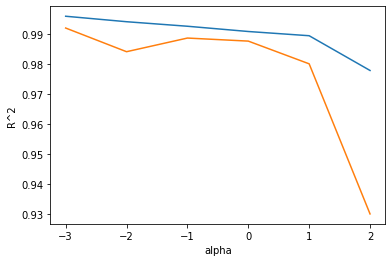

In [50]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")